<h1 align="center">AIND-CNC Spring Hackathon</h1>  
<h4 align="center"> May 14, 2025 </h4>   
<h4 align="center"> Credit Assignment During Learning</h4> 
    

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
    
**Overview:** This notebook shows how to access and analyze data from the [Credit Assignment During Learning](https://www.allenneuraldynamics.org/projects/credit-assignment-during-learning) project established at the Allen Institute for Neural Dynamics. 

**Dataset:** Calcium activity was recorded from hundreds of cortical neurons in the mouse brain while the animal learned and performed a Brain Computer Interface (BCI) task over several days. 
    
**Goal:** This tutorial will show you how to:  
    1. load and work with neuronal calcium activity data processed via suite2p 
    2. plot event-aligned neural activity traces 



<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

#### Import packages and load data

In [4]:
# general imports 
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats 
import os 
import pandas as pd
from skimage import measure

# pynwb imports to open nwb files
from hdmf_zarr import NWBZarrIO
from nwbwidgets import nwb2widget

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

#### Metadata

In [122]:
metadata = pd.read_csv('/data/metadata.csv') 

metadata.sort_values(by = ['name']).head(n=10)

,name,subject_id,session_type,genotype,virus,session_number
5,single-plane-ophys_731015_2025-01-10_18-06-31,731015,BCI single neuron stim,Slc17a6-IRES-Cre/wt;Ai230(TIT2L-XCaMPG-WPRE-IC...,pAAV-hSyn1-RiboL1-GCaMP8s-WPRE,18.0
32,single-plane-ophys_731015_2025-01-13_20-09-20,731015,BCI single neuron stim,Slc17a6-IRES-Cre/wt;Ai230(TIT2L-XCaMPG-WPRE-IC...,pAAV-hSyn1-RiboL1-GCaMP8s-WPRE,19.0
17,single-plane-ophys_731015_2025-01-24_20-00-44,731015,BCI single neuron stim,Slc17a6-IRES-Cre/wt;Ai230(TIT2L-XCaMPG-WPRE-IC...,pAAV-hSyn1-RiboL1-GCaMP8s-WPRE,20.0
12,single-plane-ophys_731015_2025-01-28_17-40-57,731015,BCI single neuron stim,Slc17a6-IRES-Cre/wt;Ai230(TIT2L-XCaMPG-WPRE-IC...,pAAV-hSyn1-RiboL1-GCaMP8s-WPRE,22.0
2,single-plane-ophys_731015_2025-01-28_18-56-35,731015,BCI single neuron stim,Slc17a6-IRES-Cre/wt;Ai230(TIT2L-XCaMPG-WPRE-IC...,pAAV-hSyn1-RiboL1-GCaMP8s-WPRE,22.0
45,single-plane-ophys_731015_2025-01-31_20-37-19,731015,BCI single neuron stim,Slc17a6-IRES-Cre/wt;Ai230(TIT2L-XCaMPG-WPRE-IC...,pAAV-hSyn1-RiboL1-GCaMP8s-WPRE,23.0
43,single-plane-ophys_740369_2025-01-09_17-18-37,740369,BCI single neuron stim,Slc17a6-IRES-Cre/wt;Ai230(TIT2L-XCaMPG-WPRE-IC...,pAAV-hSyn1-RiboL1-GCaMP8s-WPRE,22.0
6,single-plane-ophys_740369_2025-01-10_20-21-40,740369,BCI single neuron stim,Slc17a6-IRES-Cre/wt;Ai230(TIT2L-XCaMPG-WPRE-IC...,pAAV-hSyn1-RiboL1-GCaMP8s-WPRE,23.0
27,single-plane-ophys_740369_2025-01-13_17-31-04,740369,BCI single neuron stim,Slc17a6-IRES-Cre/wt;Ai230(TIT2L-XCaMPG-WPRE-IC...,pAAV-hSyn1-RiboL1-GCaMP8s-WPRE,24.0
18,single-plane-ophys_740369_2025-01-24_21-18-11,740369,BCI single neuron stim,Slc17a6-IRES-Cre/wt;Ai230(TIT2L-XCaMPG-WPRE-IC...,pAAV-hSyn1-RiboL1-GCaMP8s-WPRE,25.0


<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

#### Data Organization 

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

The metadata "name" column indicates the name of the data asset. 
    
The naming scheme for each data asset is as follows:
 > single-plane-ophys (data type) <br> 
   772414 (subject id number) <br> 
   2025-01-10_18-06-31 (experiment date (%Y-%m-%d %H:%M:%S)) <br>

In [143]:
session_name = metadata.name[1]
session_name

'single-plane-ophys_772414_2025-01-23_16-03-51'

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

Within the '/data' directory are folders with processed data for each experimental session.<br> 
    
The naming scheme for these folders is as follows: 
 > single-plane-ophys_772414_2025-01-28_16-19-17 (data asset name) <br> 
    processed <br> 
    2025-05-4-17-26-28 (processing date (%Y-%m-%d %H:%M:%S"))

In [110]:
os.listdir('/data')[1:10]

['single-plane-ophys_772414_2025-02-12_14-24-04_processed_2025-05-04_17-26-28',
 'single-plane-ophys_731015_2025-01-13_20-09-20_processed_2025-05-03_09-14-29',
 'single-plane-ophys_740369_2025-01-13_17-31-04_processed_2025-05-03_11-38-39',
 'single-plane-ophys_772414_2025-02-13_14-39-41_processed_2025-05-04_19-25-37',
 'single-plane-ophys_754303_2025-01-23_19-48-32_processed_2025-05-03_17-57-19',
 'single-plane-ophys_731015_2025-01-10_18-06-31_processed_2025-05-03_12-44-35',
 'single-plane-ophys_766719_2025-01-22_16-45-18_processed_2025-05-04_01-47-57',
 'single-plane-ophys_767715_2025-01-31_18-15-21_processed_2025-05-04_03-41-08',
 'single-plane-ophys_772414_2025-02-04_13-21-29_processed_2025-05-04_14-56-05']

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

These data assets were run through a processing pipeline which: 
    1) runs the data through Suite2p to extract ROIs and calculates the change in fluorescence for each ROI compared to a baseline
    2) packages the data as a Neurodata Without Borders (NWB) file 

Here, we'll work with the NWB files, which contains the ophys data, behavior data, metadata, and stimulus tables. The NWB directories contain the file name and end in '_behavior_nwb') 

In [116]:
os.listdir('/data/single-plane-ophys_767715_2025-02-10_16-04-20_processed_2025-05-06_17-10-16')

['output',
 'processing.json',
 'capsule',
 'MOp2_3_0',
 'single-plane-ophys_767715_2025-02-10_16-04-20_behavior_nwb']

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

These NWB files are stored in a Zarr format, which is optimized for large data objects stored in the cloud. To load these NWB files, we'll use the NWBZarrIO package from hdmf_zarr. 

In [165]:
nwb_file = '/data/single-plane-ophys_740369_2025-01-24_21-18-11_processed_2025-05-06_04-13-51/single-plane-ophys_740369_2025-01-24_21-18-11_behavior_nwb'

with NWBZarrIO(nwb_file, "r") as io:
    nwbfile= io.read()

/opt/conda/lib/python3.10/site-packages/hdmf/spec/namespace.py:535: UserWarning:

Ignoring cached namespace 'core' version 2.7.0 because version 2.8.0 is already loaded.



<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

Alternatively, we've written a helper function that finds the nwb directory name that matches a given file_name input and loads the data. 

In [151]:
# # to do - maybe move this as a separate .py file 
# import os
# from hdmf_zarr import NWBZarrIO

# def load_nwb_by_filename(data_filename):
#     """
#     Search for and load an NWB file matching the given data filename.

#     Parameters:
#     - data_filename (str): The base name of the data file to match (e.g., 'single-plane-ophys_772414_2025-01-28_16-19-17').
#     - base_dir (str): Base directory to search. Defaults to '/data'.

#     Returns:
#     - nwbfile: Loaded NWBFile object if found, else None.
#     """
#     target_file_name = f"{data_filename}_behavior_nwb"
#     base_dir = '/data'

#     for dir_name in os.listdir(base_dir):
#         if data_filename in dir_name:
#             dir_path = os.path.join(base_dir, dir_name)
#             if os.path.isdir(dir_path):
#                 if target_file_name in os.listdir(dir_path):
#                     file_path = os.path.join(dir_path, target_file_name)
#                     try:
#                         with NWBZarrIO(file_path, 'r') as io:
#                             nwbfile = io.read()
#                             print(f"Loaded NWB file from: {file_path}")
#                             return nwbfile
#                     except Exception as e:
#                         print(f"Error loading file from {file_path}: {e}")
#     print("No matching NWB file found.")
#     return None


In [148]:
# nwbfile = load_nwb_by_filename(session_name)

Loaded NWB file from: /data/single-plane-ophys_772414_2025-01-23_16-03-51_processed_2025-05-04_11-09-46/single-plane-ophys_772414_2025-01-23_16-03-51_behavior_nwb


<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

`nwb2widget` creates an interactive widget to explore the hierarchical contents of the NWB file. The widget can also render interactive data plots (e.g. calcium activity traces, image segmentation masks). 

In [166]:
nwb2widget(nwbfile) 


<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

#### 1. Plot Calcium Activity Traces for Select ROIs 
    
The raw data was processed through Suite2p, which extracts the cell body ROIs and calculates the change in fluorescence (dff). Let's pull that data from the nwb file below. The shape of dff is (frames, roi). 
    
We'll also save the frame_rate so we can easily convert from frames to seconds. 
    

In [169]:
dff = nwbfile.processing["processed"].data_interfaces["dff"].roi_response_series["dff"].data

print('dff shape:',np.shape(dff))

frame_rate = nwbfile.imaging_planes["processed"].imaging_rate
print('Frame Rate:', frame_rate)

dff shape: (191947, 529)
Frame Rate: 58.2634


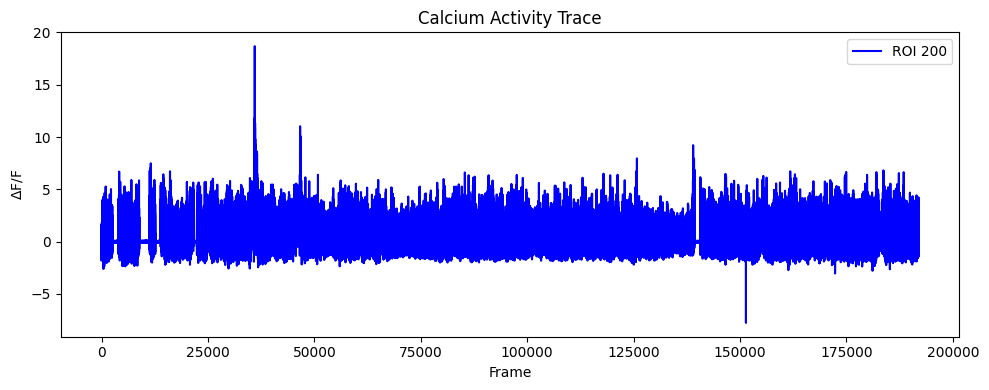

In [177]:
# Select an ROI 
ROI = 200

# Create figure with two vertically stacked plots 

# Top: Calcium trace plot
plt.rcParams["figure.figsize"] = (10, 4)

plt.plot(dff[:, ROI], label=f'ROI {ROI}', color='blue')

plt.ylabel(r'$\Delta$F/F')
plt.xlabel('Frame')
plt.title('Calcium Activity Trace')
plt.legend(loc='upper right')


plt.tight_layout()
plt.show()

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

#### Experiment Structure 
    
The dff array covers the entire experimental period, which has 5 experimental epochs. 

    1. Photostimulation of single neurons * 
    2. Spontaneous activity *
    3. BCI behavior task 
    4. Spontaneous activity * 
    5. Photostimulation of random single neurons * 
    

The stimulus tables in the stimulus>PhotostimTrials and the behavior table in the intervals>trials containers contains the start/stop times for each epoch. 

*In some cases, the spontaneous epoch happens before the photostimulation period. Check the stimulus tables for each data file to get the exact timing order of each epoch. 

In [179]:
# add markdown content about photostim table and column descriptions

In [178]:
photostim_table = nwbfile.stimulus["PhotostimTrials"].to_dataframe()
photostim_table


,start_time,stop_time,start_frame,stop_frame,tiff_file,stim_name,laser_stim_x,laser_stim_y,power,duration,stimulus_function,group_index
id,,,,,,,,,,,,
0,0.000000,1.115623,0,65,spont_slm_00001.tif,photostim,117.646154,102.153846,4,1.115623,scanimage.mroi.stimulusfunctions.logspiral,17
1,1.132787,2.214083,66,129,spont_slm_00002.tif,photostim,368.227273,28.181818,4,1.081296,scanimage.mroi.stimulusfunctions.logspiral,47
2,2.231246,3.312543,130,193,spont_slm_00003.tif,photostim,300.888889,158.063492,4,1.081296,scanimage.mroi.stimulusfunctions.logspiral,14
3,3.329706,4.445329,194,259,spont_slm_00004.tif,photostim,235.511111,109.088889,4,1.115623,scanimage.mroi.stimulusfunctions.logspiral,9
4,4.462493,5.578116,260,325,spont_slm_00005.tif,photostim,130.714286,219.321429,4,1.115623,scanimage.mroi.stimulusfunctions.logspiral,29
...,...,...,...,...,...,...,...,...,...,...,...,...
1825,3285.630430,3286.728890,191432,191496,spontpost_slm_00830.tif,photostim_post,75.026316,47.763158,4,1.098460,scanimage.mroi.stimulusfunctions.logspiral,35
1826,3286.746053,3287.896003,191497,191564,spontpost_slm_00831.tif,photostim_post,272.690909,13.218182,4,1.149950,scanimage.mroi.stimulusfunctions.logspiral,34
1827,3287.913167,3289.028790,191565,191630,spontpost_slm_00832.tif,photostim_post,223.056604,153.452830,4,1.115623,scanimage.mroi.stimulusfunctions.logspiral,43


<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

There are two photostimulation periods - one before and one after the BCI behavior sessions. 

In [88]:
photostim_table.stim_name.unique().tolist()

['photostim', 'photostim_post']

In [180]:
# add markdown content about behavior table and each column 

In [90]:
behavior_table = nwbfile.trials.to_dataframe()
behavior_table

# note the BCI behavior times are relative to start of each trial 

,start_time,stop_time,BCI_go_cue,BCI_trial_hit,BCI_lick_L,BCI_reward_time,BCI_threshold_crossing_times,BCI_zaber_steps,BCI_movie_name,BCI_start_frame,BCI_stop_frame
id,,,,,,,,,,,
0,1414.163952,1419.604760,0.2359,True,"[1.7639, 1.8081, 2.1663, 2.2905, 2.4045, 2.514...",2.1663,2.1441,"[0.3586, 0.9096, 1.0876, 1.1696, 1.2326, 1.291...",neuron103_00001.tif,82394,82711
1,1419.621924,1426.075375,0.2359,True,"[2.6966, 2.8099000000000003, 2.9285, 3.0345, 3...",2.8099,2.7350,"[0.6412, 0.7972, 0.9292, 0.9932, 1.43210000000...",neuron103_00002.tif,82712,83088
2,1426.092538,1431.069934,0.2359,True,"[0.7695000000000001, 0.8809, 0.9818, 1.0866, 1...",0.8809,0.7748,"[0.287, 0.347, 0.404, 0.447, 0.49, 0.522, 0.55...",neuron103_00003.tif,83089,83379
3,1431.087098,1438.759152,0.2359,True,"[0.6944, 0.8252, 0.9415, 1.0464, 1.15, 1.2573,...",0.8252,0.7086,"[0.2869, 0.3189, 0.3509, 0.3829, 0.4149, 0.447...",neuron103_00004.tif,83380,83827
4,1438.776316,1444.302941,0.2359,True,"[1.7752, 1.9272, 2.0483, 2.1583, 2.2703, 2.377...",1.9272,1.7943,"[0.2863, 0.3903, 0.7803, 0.8422000000000001, 0...",neuron103_00005.tif,83828,84150
...,...,...,...,...,...,...,...,...,...,...,...
71,2097.766351,2109.797918,0.2359,True,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",NaN,NaN,"[0.2868, 1.4747, 2.3606000000000003, 3.1646, 4...",neuron103_00072.tif,122223,122924
72,2109.815081,2123.700299,0.2359,True,"[0.0341, 9.2887, 9.5001, 10.0293, 10.142, 10.2...",10.0293,9.9555,"[0.2871, 1.094, 2.0689, 2.7769, 3.470900000000...",neuron103_00073.tif,122925,123734
73,2123.717462,2135.749029,0.2359,True,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",NaN,NaN,"[0.3111, 2.665, 3.3089, 4.1749, 5.1698, 6.0268...",neuron103_00074.tif,123735,124436


In [181]:
# Write function to create an epoch table with start/stop times from each table...

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

Let's grab the frame ranges for each photostimulation session. 

In [89]:
photostim_start = photostim_table[photostim_table.stim_name == 'photostim'].start_frame.tolist()[0]
photostim_stop = photostim_table[photostim_table.stim_name == 'photostim'].stop_frame.tolist()[-1]

photostim_post_start = photostim_table[photostim_table.stim_name == 'photostim_post'].start_frame.tolist()[0]
photostim_post_stop = photostim_table[photostim_table.stim_name == 'photostim_post'].stop_frame.tolist()[-1]

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

The BCI behavior information is stored in the trials table of the intervals container. Let's walk through the organization of the table and grab the time ranges for the behavior session.  

In [91]:
behavior_start = behavior_table.BCI_start_frame.tolist()[0]
behavior_stop = behavior_table.BCI_stop_frame.tolist()[-1]

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

Now, let's plot the calcium activity trace for a selected ROI, with the different stimulus epochs overlaid. We'll also show the image segmentation for the selected ROI. 

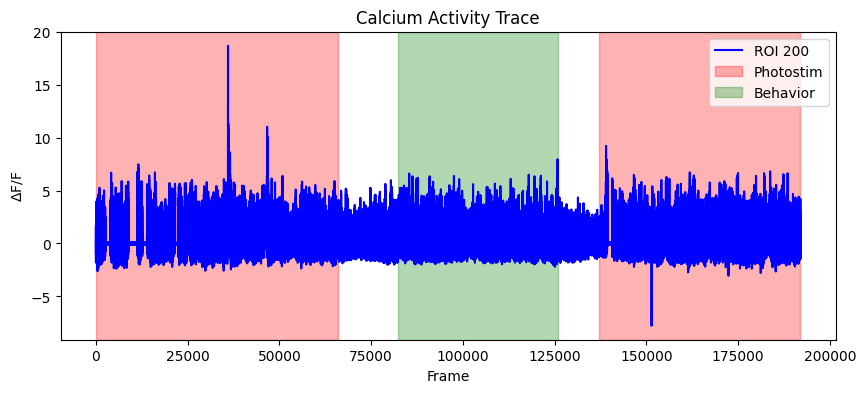

In [185]:
# Select an ROI 
ROI = 200

# Create figure with two vertically stacked plots 

# Top: Calcium trace plot
plt.rcParams["figure.figsize"] = (10, 4)

plt.plot(dff[:, ROI], label=f'ROI {ROI}', color='blue')

plt.axvspan(photostim_start, photostim_stop, color='red', alpha=0.3, label='Photostim')
plt.axvspan(behavior_start, behavior_stop, color='green', alpha=0.3, label='Behavior')
plt.axvspan(photostim_post_start, photostim_post_stop, color='red', alpha=0.3)

plt.ylabel(r'$\Delta$F/F')
plt.xlabel('Frame')
plt.title('Calcium Activity Trace')
plt.legend(loc='upper right')
plt.show()

In [ ]:
# Markdown content unpacking the image segmentation table 

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

Each row in dff represents an ROI extracted using suite2p then classified as either a soma or a dendrite. 
    
to do: explain the columns and image

In [186]:
image_segmentation = nwbfile.processing["processed"].data_interfaces["image_segmentation"].plane_segmentations["roi_table"].to_dataframe()
image_segmentation

,is_soma,soma_probability,is_dendrite,dendrite_probability,image_mask
id,,,,,
0,1,0.999988,0,0.000000e+00,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
1,1,1.000000,0,0.000000e+00,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
2,1,0.999987,0,0.000000e+00,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
3,1,1.000000,0,0.000000e+00,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
4,1,1.000000,0,0.000000e+00,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
...,...,...,...,...,...
524,1,0.998766,0,0.000000e+00,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
525,1,0.907050,0,0.000000e+00,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
526,0,0.000010,0,0.000000e+00,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."


<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

After running suite2p to extract ROIs, an additional classifier is applied to the segmentations to classify somas vs dendrites. Let's filter and save both the dff array and image segmentation to contain only the ROI rows that pass soma detection (is_soma == 1) 

In [287]:
# Filtering the image_segmentation table for somas 
soma_segmentation = image_segmentation[image_segmentation.is_soma == 1].reset_index() 

# Appending rows from dff that correspond with soma rows in the image segmentation table

soma_list = [] 

for idx in range(0, len(image_segmentation)): 
    if image_segmentation['is_soma'][idx] == 1: 
        soma_list.append(dff[:, idx]) 

soma_dff = np.column_stack(soma_list) 
        

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

We can combine information from the soma_segmentation table to identify where the ROIs are in the image. Let's add a new plot below our calcium activity trace to show the mask for our selected ROI. 
    
Another piece of data we'll load is the max projection image of the field of view. We'll overlay the ROI masks on top of this image. This is found in the processing container of the NWB. 
    
(Note that max_projection looks bad and it looks like there are many more segmentation masks thant whats in image...) 

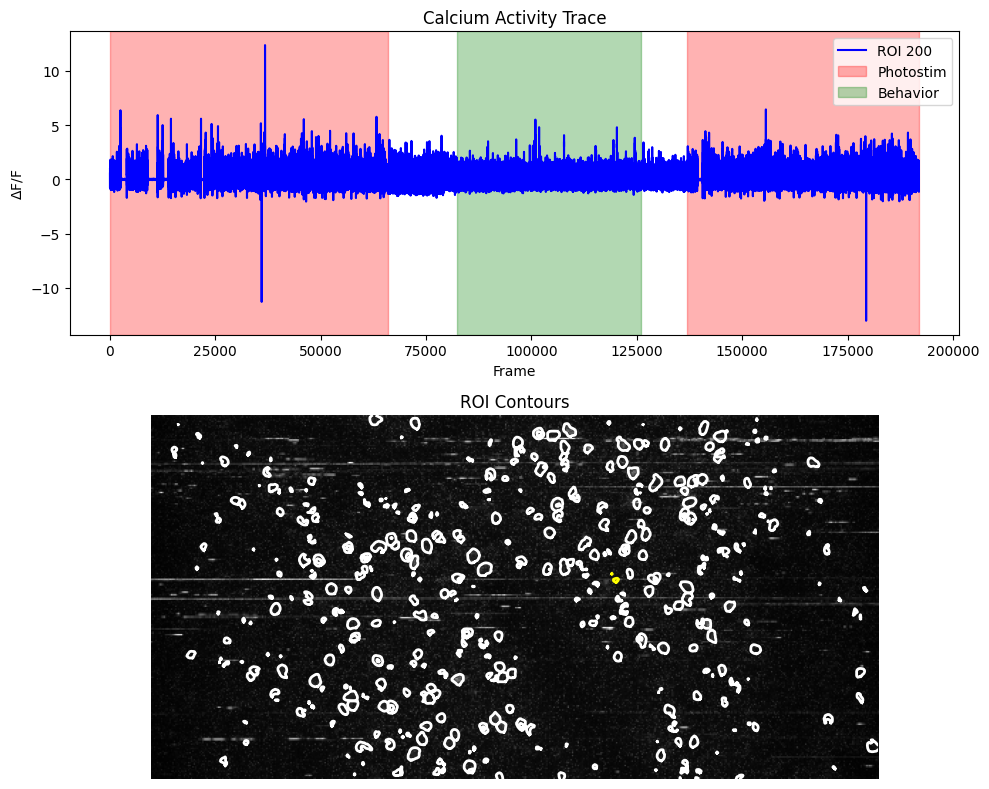

In [288]:
# Parameters 
ROI = 200
image = nwbfile.processing["processed"].data_interfaces["images"].images["max_projection"].data[:]  # shape: (H, W)

# Create figure with two vertically stacked plots 
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8), height_ratios=[1, 1.2])

# Top: Calcium trace plot
ax1.plot(soma_dff[:, ROI], label=f'ROI {ROI}', color='blue')

# Add shaded regions
ax1.axvspan(photostim_start, photostim_stop, color='red', alpha=0.3, label='Photostim')
ax1.axvspan(behavior_start, behavior_stop, color='green', alpha=0.3, label='Behavior')
ax1.axvspan(photostim_post_start, photostim_post_stop, color='red', alpha=0.3)

ax1.set_ylabel(r'$\Delta$F/F')
ax1.set_xlabel('Frame')
ax1.set_title('Calcium Activity Trace')
ax1.legend(loc='upper right')

# Bottom: Grayscale image with ROI contours 
ax2.imshow(image, cmap='gray')
ax2.set_title('ROI Contours')
ax2.axis('off')

# Overlay ROI contours
for i, mask in enumerate(soma_segmentation.image_mask):
    mask_array = np.array(mask)
    contours = measure.find_contours(mask_array, level=0.5)
    for contour in contours:
        color = 'yellow' if i == ROI else 'white'
        linewidth = 2.0 if i == ROI else 2
        ax2.plot(contour[:, 1], contour[:, 0], color=color, linewidth=linewidth)

plt.tight_layout()
plt.show()

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

Align ROI DFF to events (e.g. photostimulus periods, BCI events

to do - need to figure out correct BCI event, write some code to convert BCI times which are in seconds and relative to start of trial 

In [17]:
def event_aligned_activity(dff, stimulus_frames, pre_frames, post_frames):
    """
    Extract perievent windows around stimulus frames from timeseries data

    Parameters:
    - dff: np.ndarray of shape (n_frames, n_rois)
    - stimulus_frames: list or array of stimulus frame indices
    - pre_frames: number of frames before the stimulus
    - post_frames: number of frames after the stimulus

    Returns:
    - aligned_data: np.ndarray of shape (n_events * n_rois, pre+post)
    - mean_response: np.ndarray of shape (pre+post, 1)
    """
    aligned_data = []

    for frame in stimulus_frames:
        if frame - pre_frames < 0 or frame + post_frames >= dff.shape[0]:
            continue  # Skip events too close to start or end
        for roi in range(dff.shape[1]):
            window = dff[frame - pre_frames : frame + post_frames, roi]
            aligned_data.append(window)

    aligned_data = np.stack(aligned_data, axis=0)
    mean_response = aligned_data.mean(axis=0)
    sem = stats.sem(aligned_data, axis=0) 

    return aligned_data, mean_response


<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

Plot mean DFF in response to photostimulation

In [16]:
# to do - instead of averaging, maybe just show a single ROI, multiple ROIs, mean, and then relative based on distance.... 
# how to calculate this? 

In [18]:
pre_frames = 30   # Number of frames before the stimulus
post_frames = 30 # Number of frames after the stimulus
stimulus_frames = photostim_table[photostim_table.stim_name == "photostim"].start_frame[0:10] # just get first 50 trials 


aligned_data, mean_response = event_aligned_activity(dff, stimulus_frames, pre_frames, post_frames)


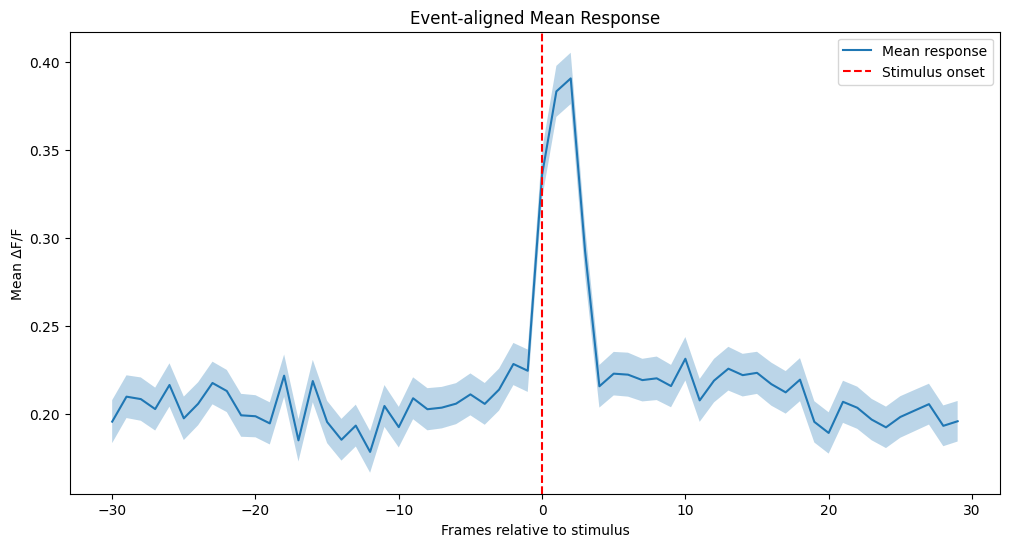

In [19]:
time = np.arange(-pre_frames, post_frames)

sem = stats.sem(aligned_data, axis=0)

plt.figure(figsize=(12, 6))
plt.plot(time, mean_response, label='Mean response')
plt.fill_between(time, mean_response - sem, mean_response + sem, alpha=0.3)
plt.axvline(0, color='red', linestyle='--', label='Stimulus onset')
plt.xlabel('Frames relative to stimulus')
plt.ylabel('Mean ΔF/F')
plt.title('Event-aligned Mean Response')
plt.legend()
plt.show()

to do: 
    load data function x 

    metadata - identify relevant metadata to pull x 
    
    
    plot ROIs with stimulus epochs overlaid - do this programmatically pulling from tables x 
    
    PSTH/event aligned neural activity x 
    
        - opto stim x 
        
        - BCI (q: which event? motor movements?) 
        
    relate ROIs in dff to ROI masks x 
        
    neural activity of each ROI organized by distance from stim neuron, maybe plot individual ROIs in response to each photostim period? and then plot relative to how far it is from stimmulus neuron ... 
    
    nice to have: something to find connected neurons from stim periods, function to compare activity across several days 
    
    questions 